In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import math
import os
import collections
import dscrutils2py as dscrutils

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pymir import mpl_stylesheet
from pymir import mpl_utils
from pymir import pd_utils

import methodprops
import methodplots
import convergence_plots as convplots
import dsc_extract

mpl_stylesheet.banskt_presentation()

In [2]:
dsc_outdir = os.path.realpath("../dsc/dsc_result")
highdims   = (100, 200)
lowdims    = (500, 200)
sfracs     = [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1.0]
targets    = ["simulate", "simulate.dims", "simulate.se", "simulate.rho",
              "simulate.sfrac", "simulate.pve", "fit", "fit.DSC_TIME", "mse.err"]
methods    = ["em_vamp", "em_vamp_ash"]
conditions = None
#conditions = [f"$(fit) == '{method}'"]

In [3]:
dscout = dscrutils.dscquery(dsc_outdir, targets, conditions = conditions)
dscout['score1'] = np.sqrt(dscout['mse.err'])/dscout['simulate.se']
pve_list = sorted(list(set(dscout["simulate.pve"].to_list())))
rho_list = sorted(list(set(dscout["simulate.rho"].to_list())))

Calling: dsc-query /home/saikat/Documents/work/ebmr/simulation/eb-linreg-dsc/dsc/dsc_result -o /tmp/RtmpblGv8S/file4aa75a9adbad.csv --target "simulate simulate.dims simulate.se simulate.rho simulate.sfrac simulate.pve fit fit.DSC_TIME mse.err" --force 
Loaded dscquery output table with 22400 rows and 12 columns.



INFO: Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: NumExpr defaulting to 8 threads.


In [4]:
dscout

,DSC,simulate,simulate.dims,simulate.se,simulate.rho,simulate.sfrac,simulate.pve,fit,fit.DSC_TIME,mse.err,score1
0,1,indepgauss,"(500,200)",3.462448,0.00,0.010,0.50,l0learn,0.417,12.563997,1.023719
1,1,indepgauss,"(100,200)",0.861522,0.00,0.010,0.50,l0learn,0.872,0.654125,0.938780
2,1,indepgauss,"(500,200)",1.905777,0.00,0.025,0.50,l0learn,0.407,3.574130,0.992003
3,1,indepgauss,"(100,200)",1.249624,0.00,0.025,0.50,l0learn,0.800,1.806580,1.075596
4,1,indepgauss,"(500,200)",3.063747,0.00,0.050,0.50,l0learn,0.372,9.284629,0.994556
...,...,...,...,...,...,...,...,...,...,...,...
22395,20,equicorrgauss,"(100,200)",2.003817,0.95,0.250,0.95,mcp,0.839,10.202592,1.594033
22396,20,equicorrgauss,"(500,200)",0.856860,0.95,0.500,0.95,mcp,17.814,1.525528,1.441453
22397,20,equicorrgauss,"(100,200)",0.841918,0.95,0.500,0.95,mcp,0.866,6.398867,3.004566
22398,20,equicorrgauss,"(500,200)",0.964054,0.95,1.000,0.95,mcp,18.341,5.848087,2.508451


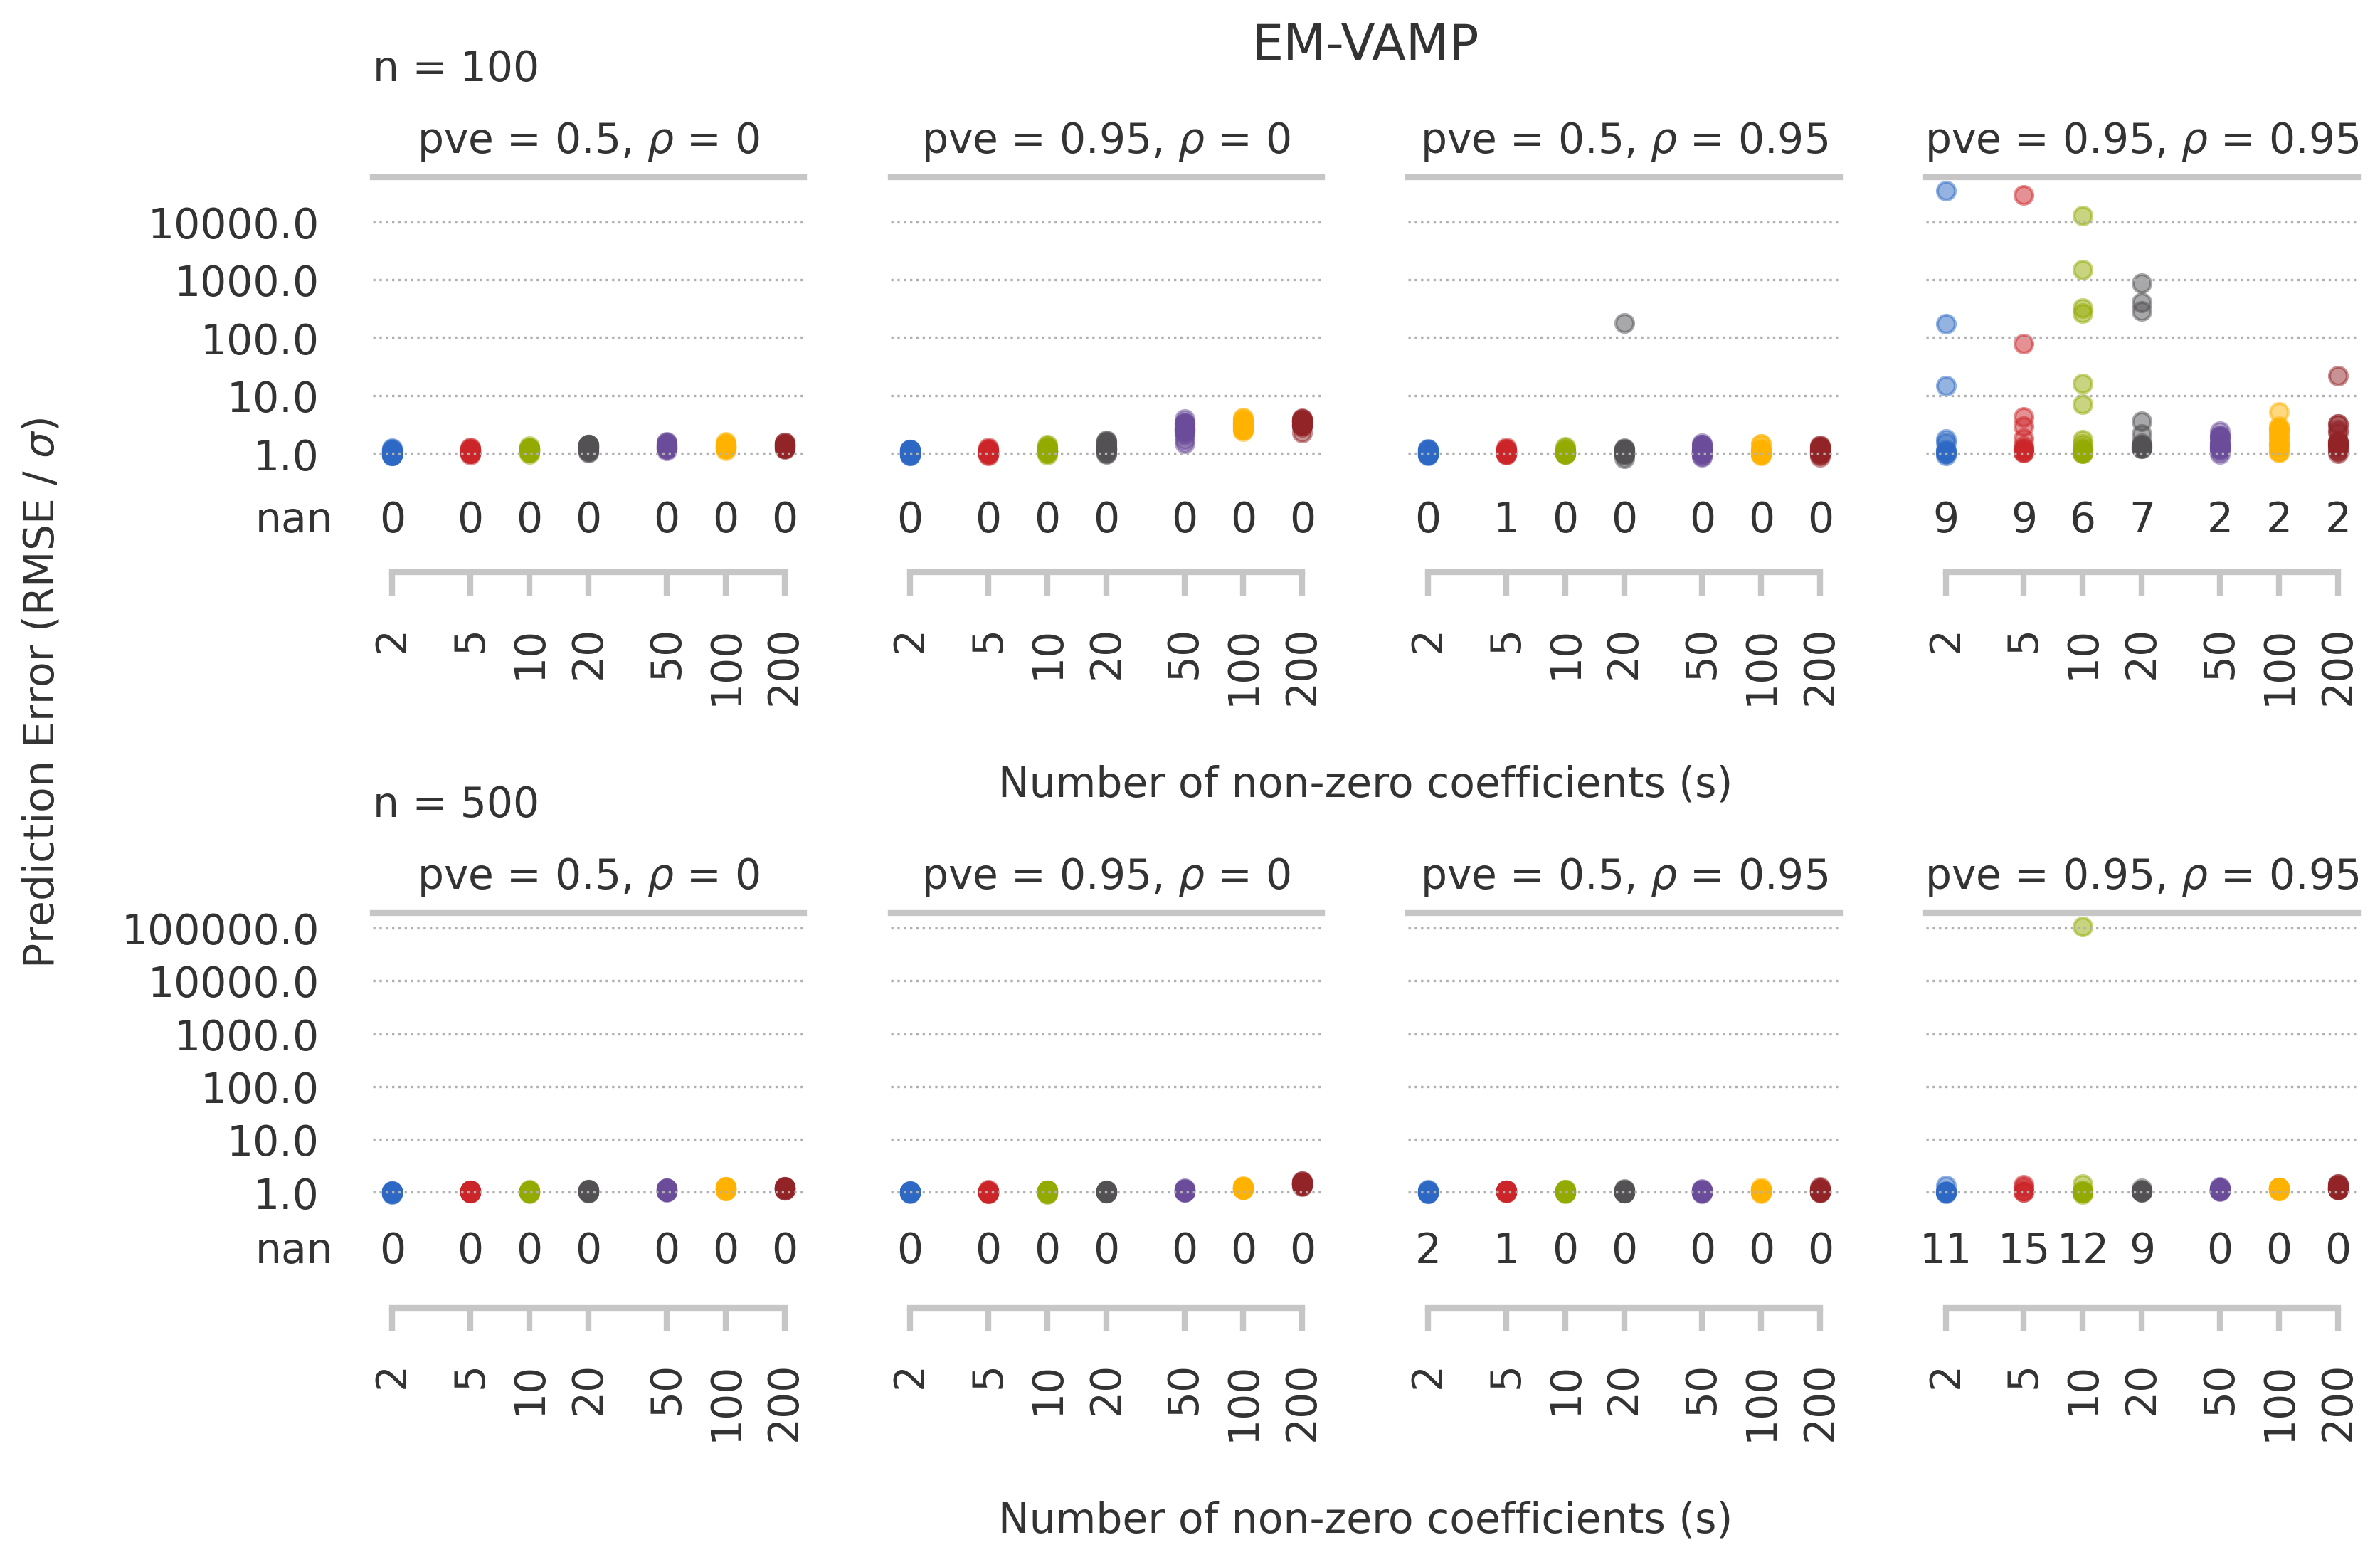

In [5]:
convplots.create_single_method_score_distribution_plot(dscout, "em_vamp", 
    [highdims, lowdims], rho_list, pve_list, sfracs, 'score1')

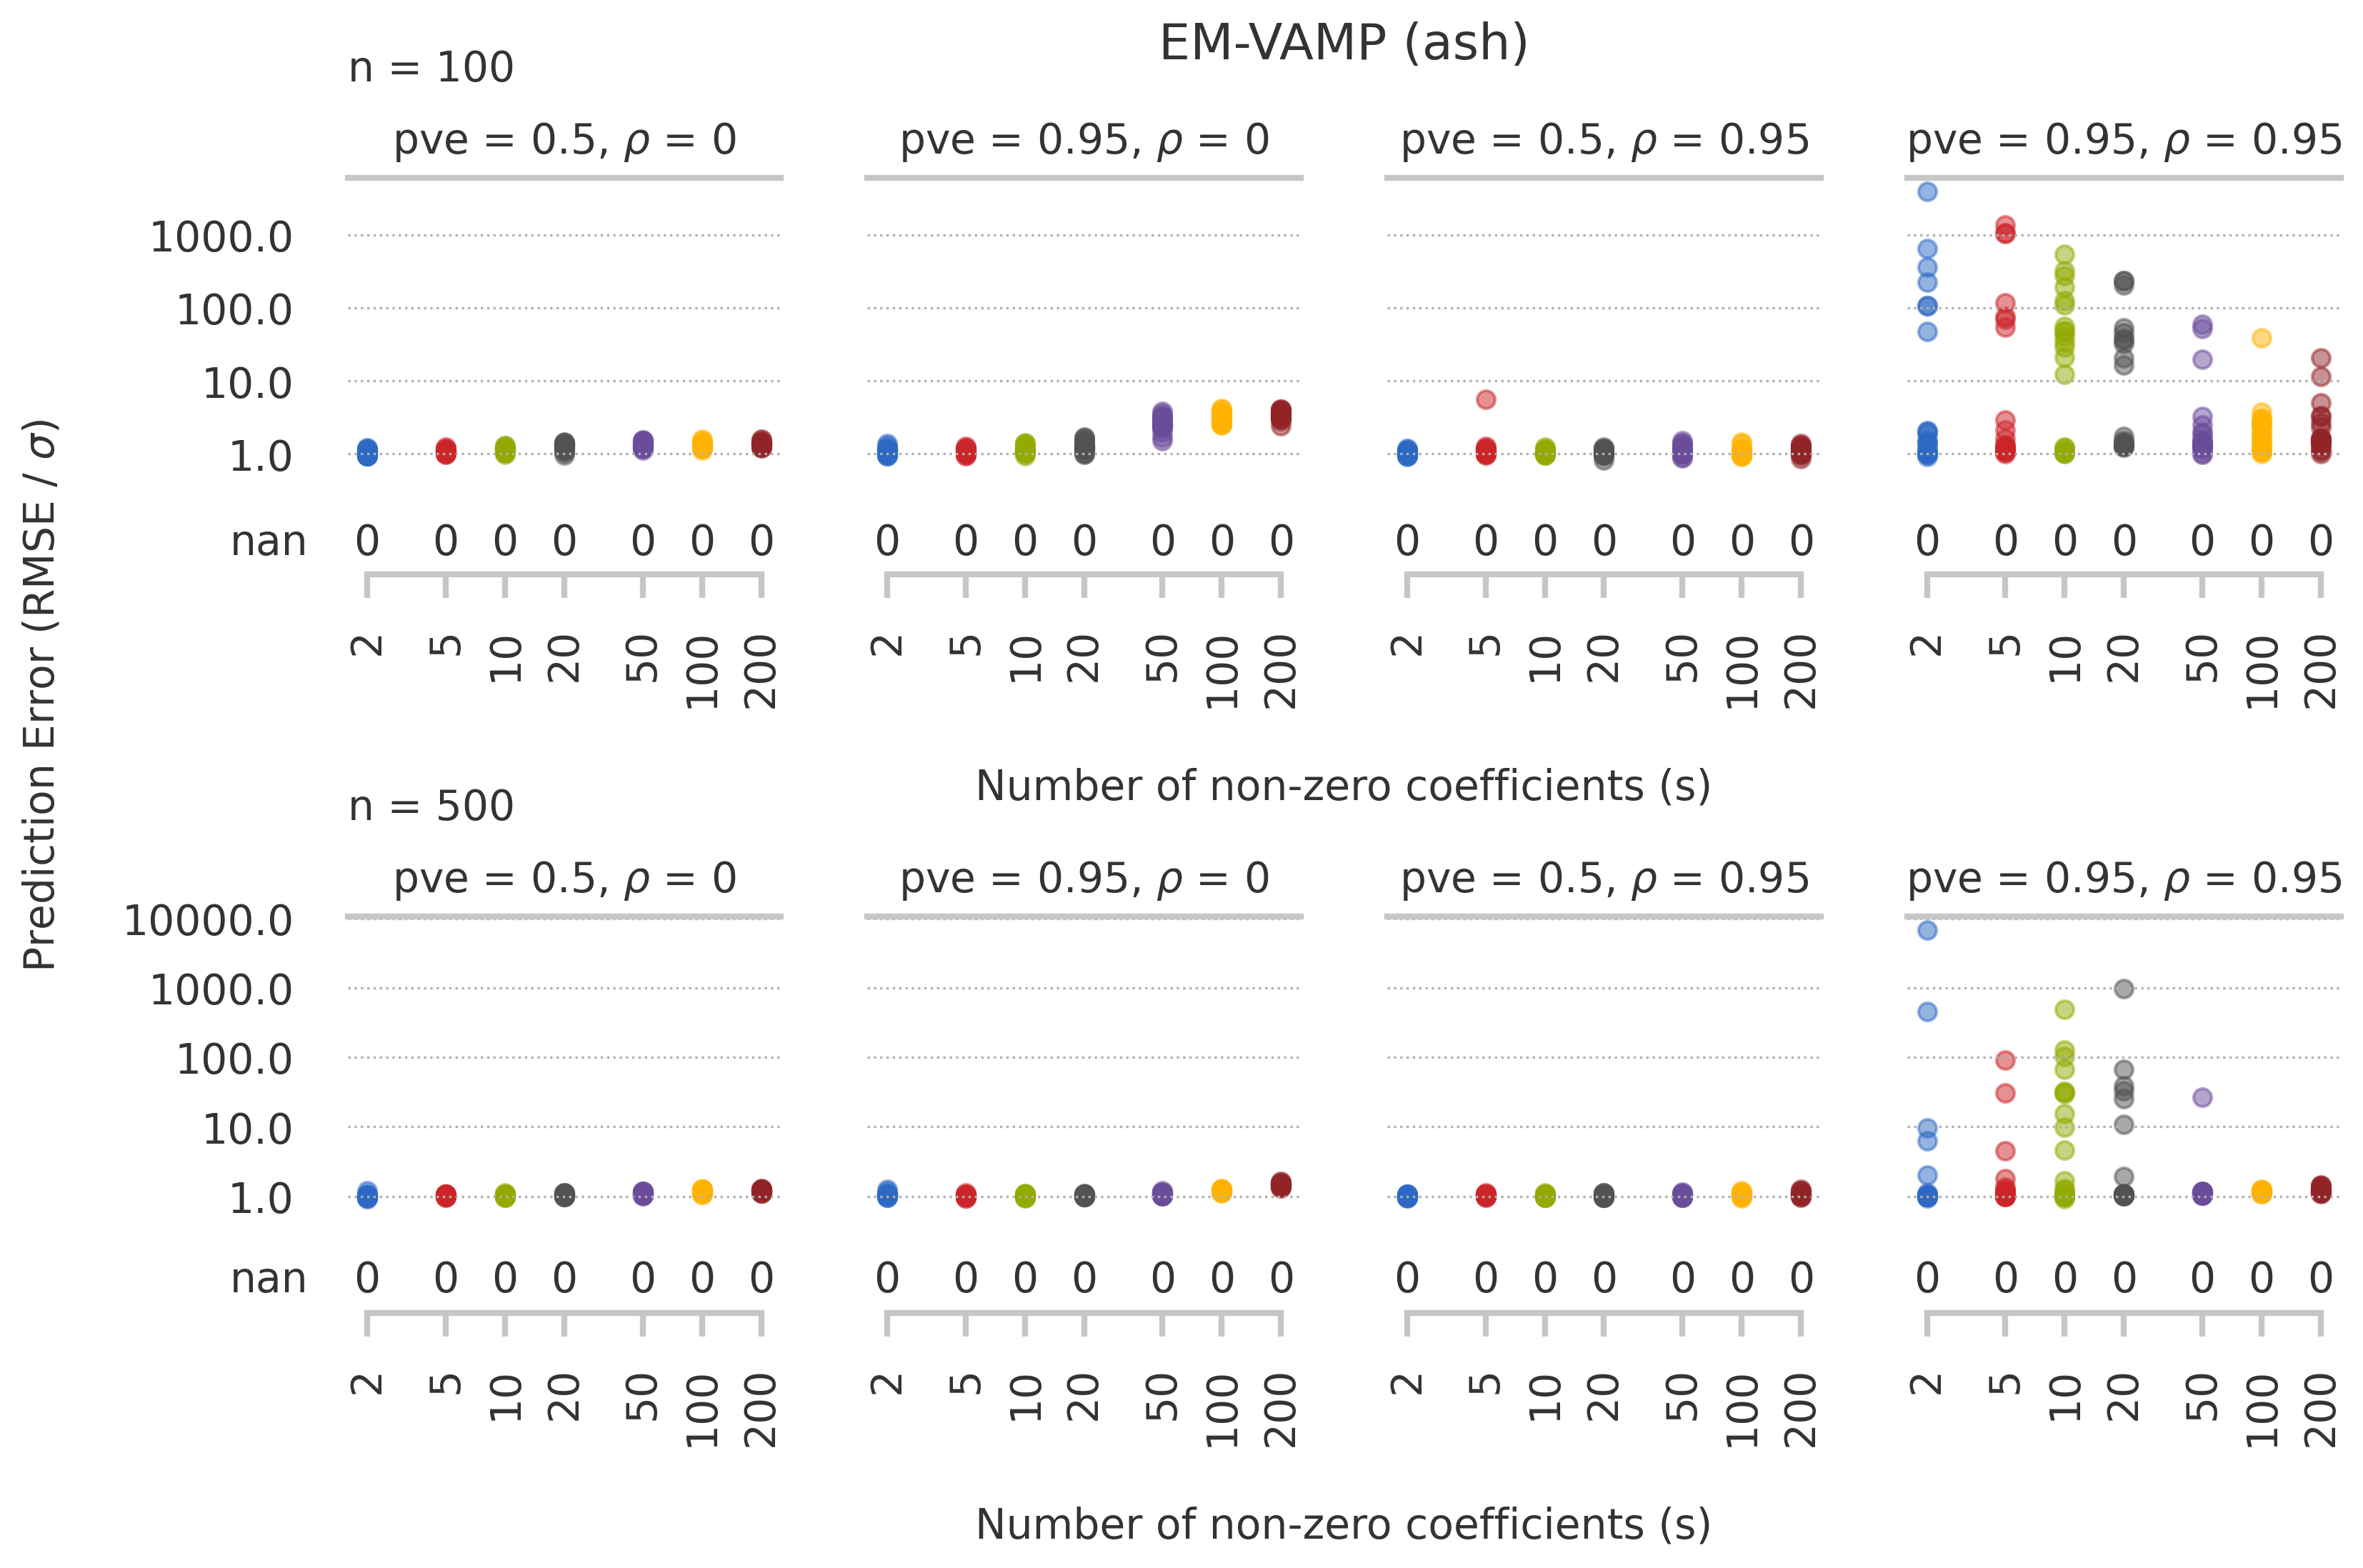

In [6]:
convplots.create_single_method_score_distribution_plot(dscout, "em_vamp_ash", 
    [highdims, lowdims], rho_list, pve_list, sfracs, 'score1')

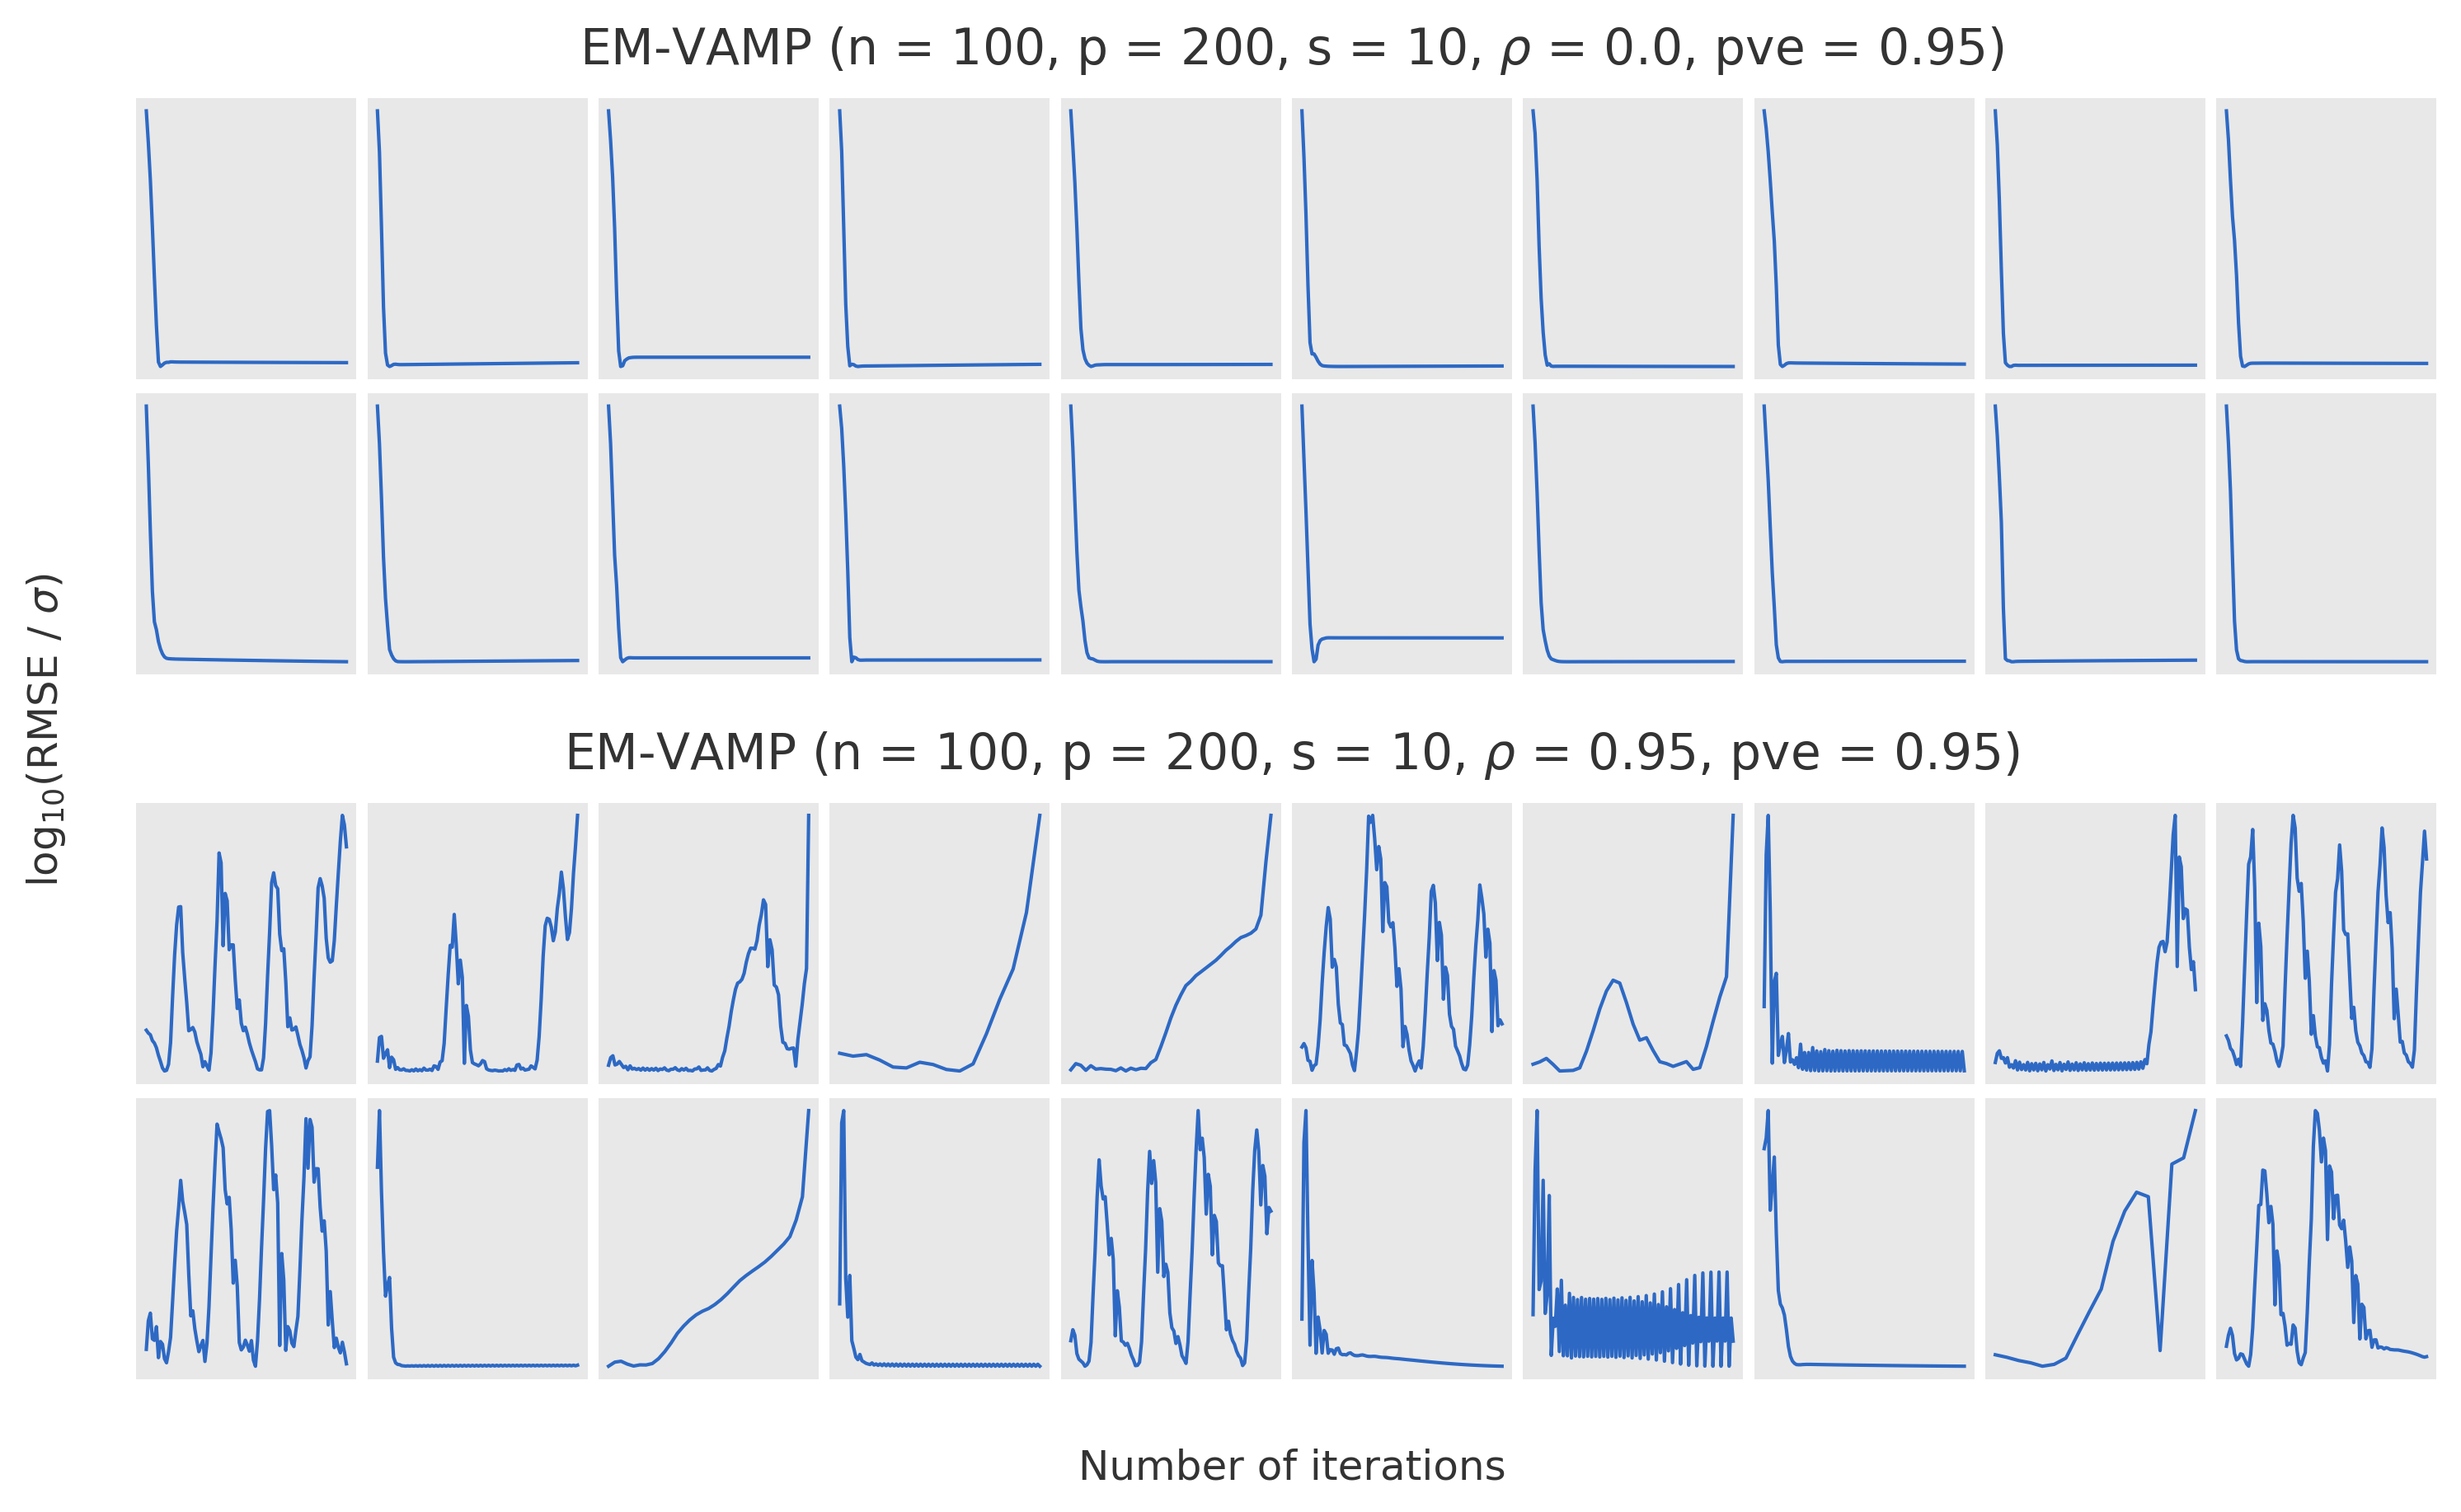

In [7]:
dim = (100, 200)
pve = 0.95
sfrac = sfracs[2]

method = "em_vamp"
allscores = dict()
for i, rho in enumerate(rho_list):
    allscores[rho] = dsc_extract.emvamp_mse_hist(dsc_outdir, method, dim, sfrac, pve, rho)
convplots.create_single_setting_score_evolution_plot(allscores, method, dim, sfrac, pve, rho_list)

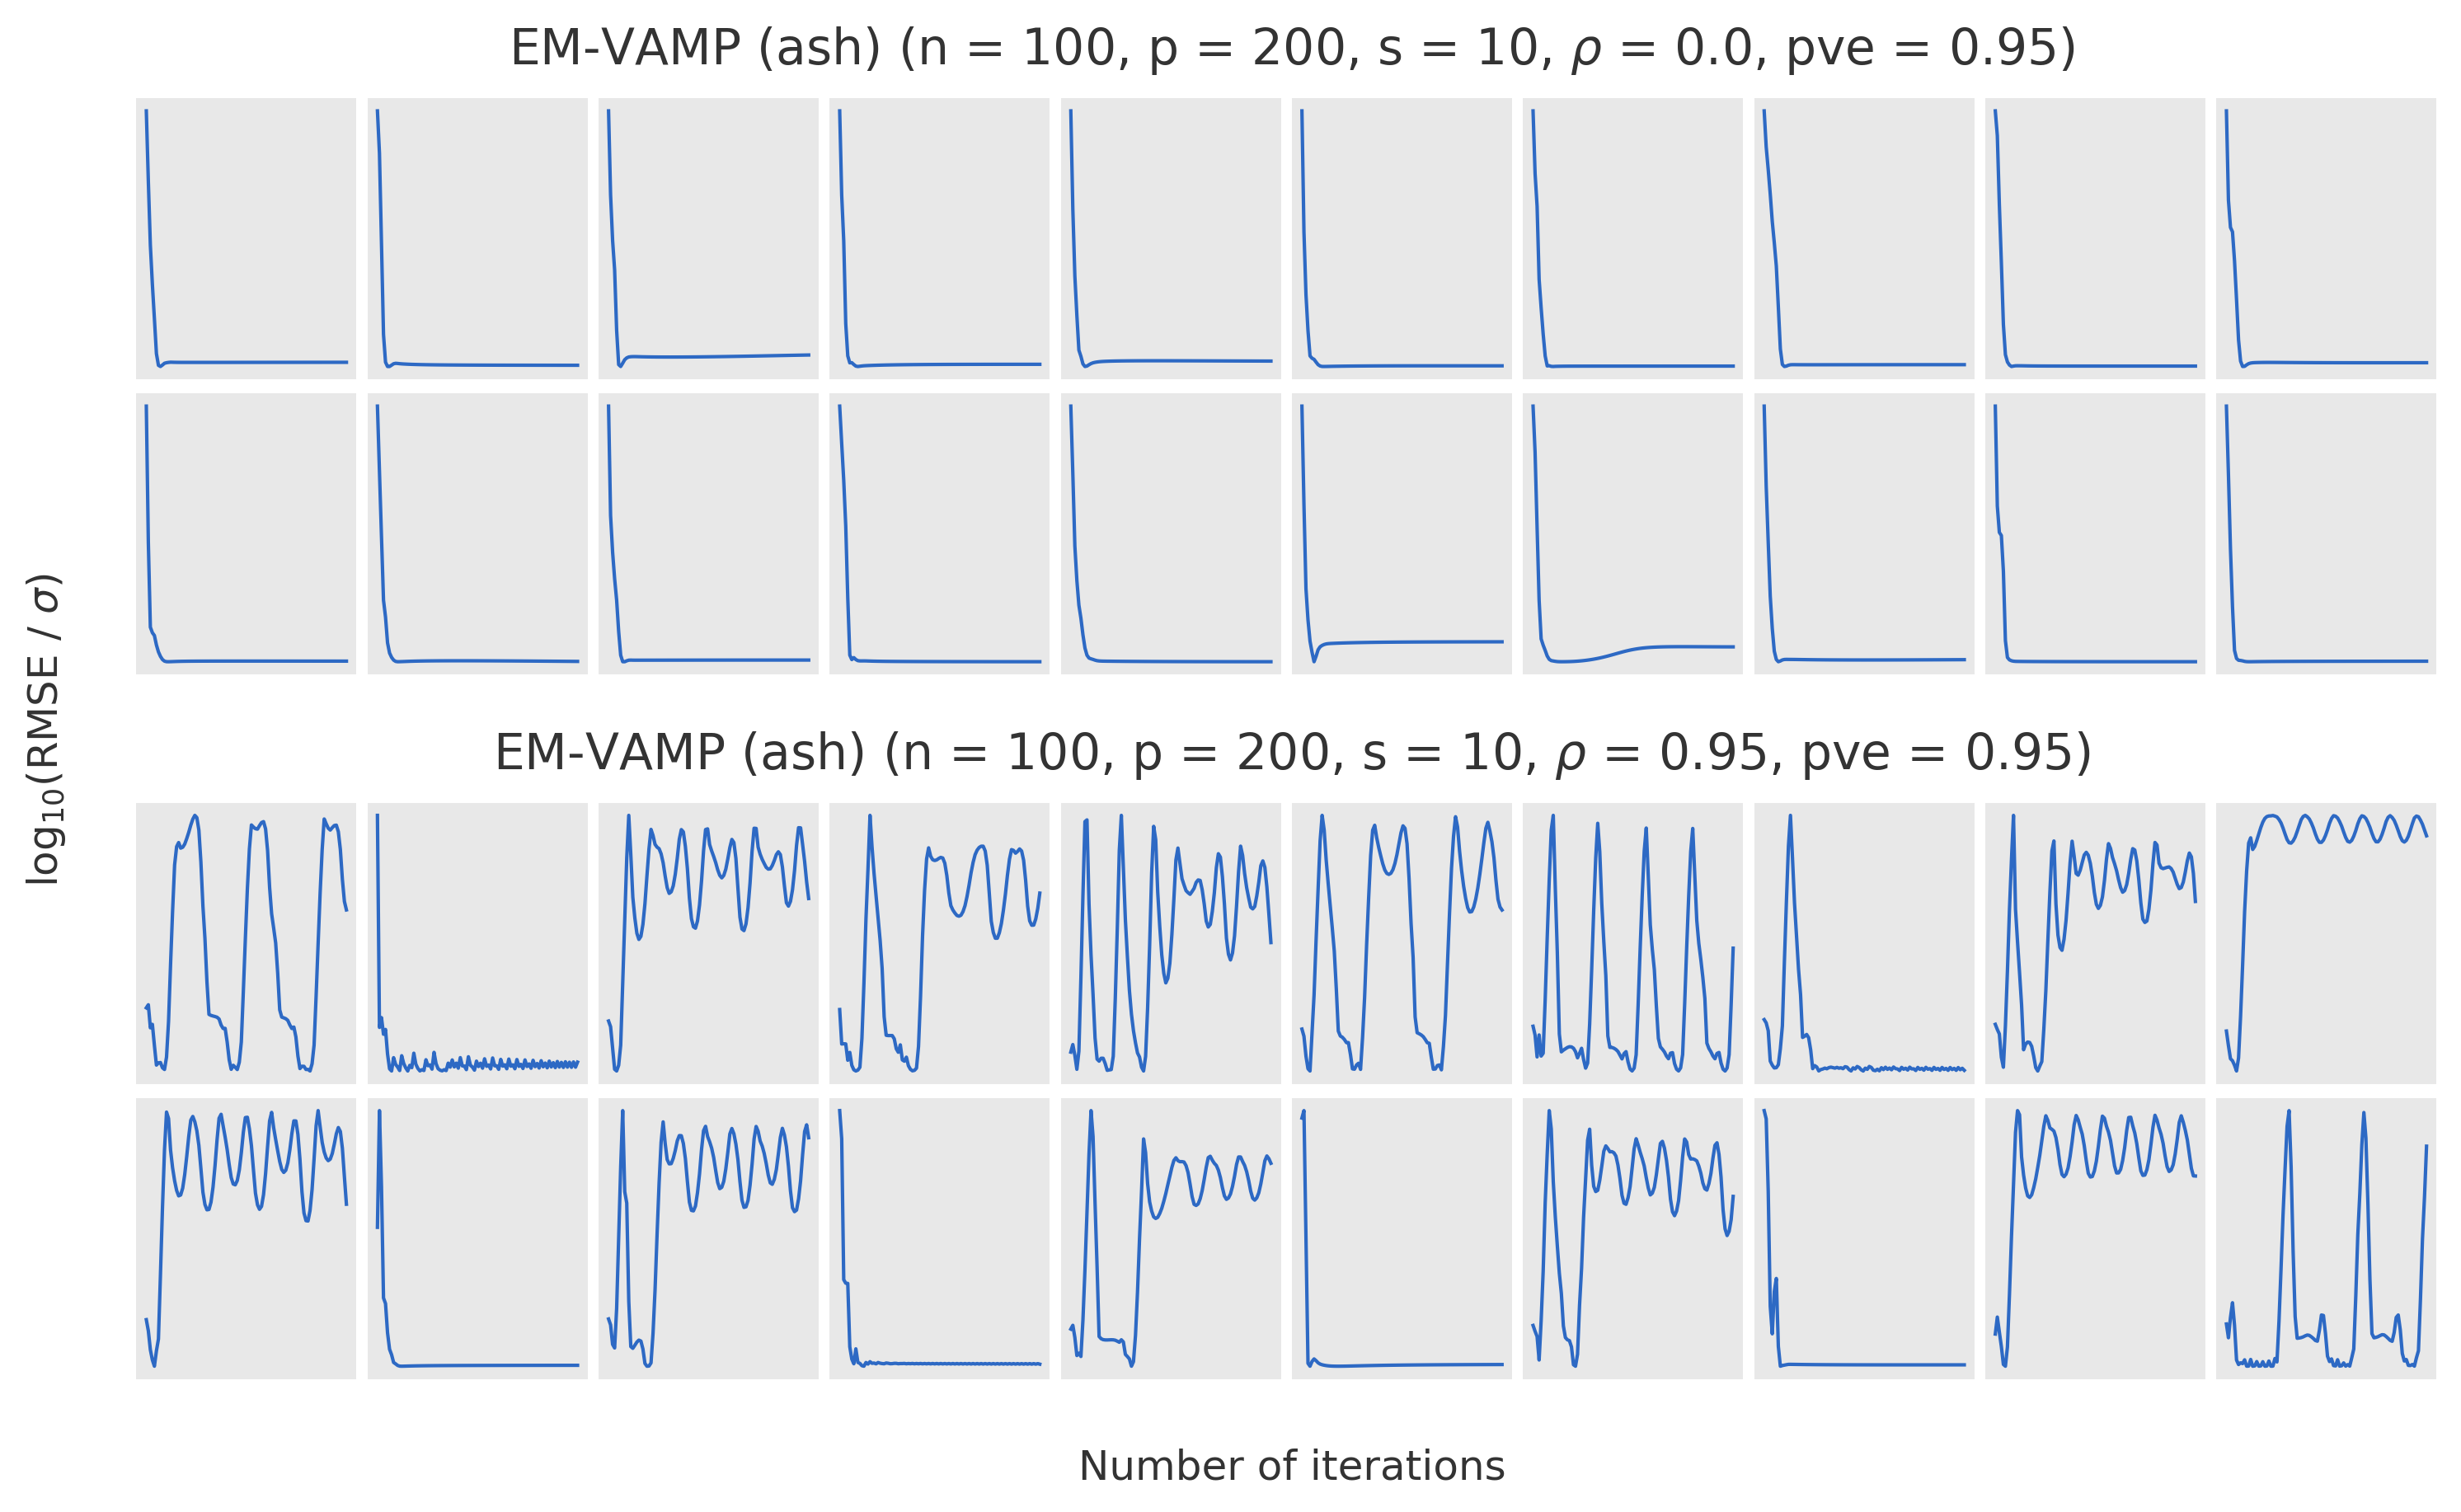

In [8]:
method = "em_vamp_ash"
allscores = dict()
for i, rho in enumerate(rho_list):
    allscores[rho] = dsc_extract.emvamp_mse_hist(dsc_outdir, method, dim, sfrac, pve, rho)
convplots.create_single_setting_score_evolution_plot(allscores, method, dim, sfrac, pve, rho_list)